In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'QzpcVXNlcnNcamJpdHRlcmxpY2hcZ2l0aHViXHJsX3N1dHRvbl9iYXJ0bw=='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"C:\\Users\\jbitterlich\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\importlib\\_bootstrap.py": 1728293208.0, "C:\\Users\\jbitterlich\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\importlib\\_bootstrap_external.py": 1728293208.0, "C:\\Users\\jbitterlich\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\zipimport.py": 1728293208.0, "C:\\Users\\jbitterlich\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\codecs.py": 1728293208.0, "C:\\Users\\jbitterlich\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\encodings\\aliases.py": 1728293208.0, "C:\\Users\\jbitterlich\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\encodings\\__init__.py": 1728293208.0, "C:\\Users\\jbitterlich\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\encodings\\utf_8.py": 1728293208.0, "C:\\Users\\jbitterlich\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\encodings\\cp1252.py": 1728293208.0, "C:\\Users\\jbitterlich\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\abc.py": 1728293208.0, "C:\\

In [2]:
import ipywidgets as widgets
from IPython.display import display
import numpy as np

# Define the hidden "success" probabilities for the four arms
arm_probabilities = [0.2, 0.5, 0.7, 0.9]

# Label widget to show your reward messages
message_label = widgets.Label(value="Pull an arm to see your reward!")

# Create four buttons, one for each arm
buttons = [widgets.Button(description=f"Arm {i+1}") for i in range(4)]

text = widgets.Text(
    value="Hello World",
    placeholder="Type something",
    description="String:",
    disabled=False,
)


# Define the button click handler
def on_button_click(b):
    arm_index = buttons.index(b)
    reward = np.random.binomial(n=1, p=arm_probabilities[arm_index])
    # Update the label's text instead of printing
    text.value = f"You pulled Arm {arm_index+1} and got a reward of {reward}."


# Attach the click event to each button
for btn in buttons:
    btn.on_click(on_button_click)


# Display the buttons and the label
display(widgets.VBox([widgets.HBox(buttons), text]))

In [3]:
import ipywidgets as widgets

test_label = widgets.Label("Hello from a label!")
test_label

Label(value='Hello from a label!')

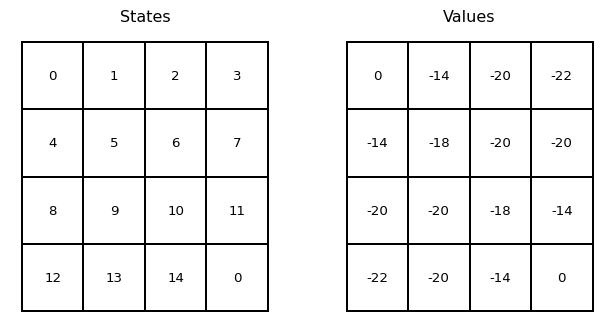

In [4]:
#| label: fig-gridworld
#| fig-cap: left 4×4 Gridworld states, right values for the equiprobable random policy
#| code-fold: true
import matplotlib.pyplot as plt

states = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 0]
values = [0, -14, -20, -22, -14, -18, -20, -20, -20, -20, -18, -14, -22, -20, -14, 0]


def draw_grid(ax, labels, title):
    """Draws a 4×4 grid with the given labels."""
    for x in range(5):
        ax.plot([0, 4], [x, x], "k-")  # Horizontal lines
        ax.plot([x, x], [0, 4], "k-")  # Vertical lines

    for i, label in enumerate(labels):
        row, col = divmod(i, 4)
        ax.text(col + 0.5, 3.5 - row, str(label), ha="center", va="center")

    ax.set_title(title)
    ax.axis("off")


def draw_gridworld():
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    draw_grid(axes[0], states, "States")
    draw_grid(axes[1], values, "Values")

    plt.show()


draw_gridworld()

In [5]:
# | code-fold: true
states = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
values = [0, -14, -20, -22, -14, -18, -20, -20, -20, -20, -18, -14, -22, -20, -14, -20]


def neighbours(state):
    # up
    if state in [1, 2, 3]:
        up = state
    elif state == 15:
        up = 13
    else:
        up = state - 4

    # down
    if state in [12, 14, 15]:
        down = state
    elif state == 11:
        down = 0
    elif state == 13:
        down = 15
    else:
        down = state + 4

    # left
    if state in [4, 8, 12]:
        left = state
    elif state == 15:
        left = 12
    else:
        left = state - 1

    # right
    if state in [3, 7, 11]:
        right = state
    elif state == 15:
        right = 14
    elif state == 14:
        right = 0
    else:
        right = state + 1

    return up, down, left, right


# Iterative value update process
sweeps = 0
while True:
    delta = 0  # Track the largest change
    sweeps += 1

    for state in range(1, 16):  # Skip state 0
        old_value = values[state]

        # full backup
        up, down, left, right = neighbours(state)
        values[state] = (
            values[up] + values[down] + values[left] + values[right]
        ) / 4 - 1

        delta = max(delta, abs(old_value - values[state]))

    if delta < 0.01:  # Convergence criterion
        break

print("new values after sweeps", sweeps)
print(values)

new values after sweeps 1
[0, -14.0, -20.0, -22.0, -14.0, -18.0, -20.0, -20.0, -20.0, -20.0, -18.0, -14.0, -22.0, -20.0, -14.0, -20.0]


In [6]:
# | code-fold: true
import numpy as np
from collections import namedtuple
from itertools import product
from scipy.stats import poisson
from collections import defaultdict
import time
import numba


# ----------------------------------------
# Global Parameters
# ----------------------------------------
EXP_REQUEST_1 = 3
EXP_REQUEST_2 = 4
EXP_RETURN_1 = 3
EXP_RETURN_2 = 2

MAX_CARS_PER_SITE = 20
MAX_CUSTOMERS = MAX_CARS_PER_SITE
MAX_CARS_SWAP = 5
RENTAL_REWARD = 10
MOVE_COST = 2
FREE_MOVES_FROM_1_TO_2 = 1
MAX_PARKING_SPACE = 10
EXTRA_PARKING_FEE = 4

GAMMA = 0.9  # Discount factor
THETA = 1e-4  # Threshold for convergence
BOUND_ACTION_SIZE = 2 * MAX_CARS_SWAP + 1

ActionData = namedtuple(
    "ActionData",
    [
        "count",  # (s1, s2) -> number of valid actions
        "possible_actions",  # (s1, s2) -> all valid actions in (s1, s2)
    ],
)
TransitionData = namedtuple(
    "TransitionData",
    [
        "count",  # how many distinct next states we have for each (s1, s2, a)
        "p",  # probability sums leading to each next state
        "pr",  # probability-weighted reward sums
        "next_s1",  # next s1 values
        "next_s2",  # next s2 values
    ],
)


def build_poisson_cache():
    """
    Builds a cache of Poisson probabilities for:
            0 -> requests at site 1
            1 -> requests at site 2
            2 -> returns at site 1
            3 -> returns at site 2

    Each row in the cache holds Poisson pmf values for k in [0,MAX_CUSTOMERS-1],
    with the last entry storing the 'tail' probability (p(k>=MAX_CUSTOMERS)).
    """
    lam_values = [EXP_REQUEST_1, EXP_REQUEST_2, EXP_RETURN_1, EXP_RETURN_2]
    poisson_cache = np.zeros((4, MAX_CUSTOMERS + 1), dtype=np.float64)

    for i, lam in enumerate(lam_values):
        pmf_so_far = 0.0
        for k in range(MAX_CUSTOMERS):
            p = poisson.pmf(k, lam)
            poisson_cache[i, k] = p
            pmf_so_far += p
        # store tail at index = MAX_CUSTOMERS
        poisson_cache[i, MAX_CUSTOMERS] = 1.0 - pmf_so_far

    return poisson_cache


@numba.njit
def event_probability(r1, r2, ret1, ret2, pc):
    return pc[0, r1] * pc[1, r2] * pc[2, ret1] * pc[3, ret2]


@numba.njit
def calculate_possible_actions():
    """
    store valid actions in possible_actions[s1,s2,:],
    and how many are actually valid in num_actions[s1,s2].
    """
    num_actions = np.zeros(
        (MAX_CARS_PER_SITE + 1, MAX_CARS_PER_SITE + 1), dtype=np.int32
    )
    possible_actions = np.zeros(
        (MAX_CARS_PER_SITE + 1, MAX_CARS_PER_SITE + 1, BOUND_ACTION_SIZE),
        dtype=np.int32,
    )

    for s1 in range(MAX_CARS_PER_SITE + 1):
        for s2 in range(MAX_CARS_PER_SITE + 1):
            min_act = -min(s2, MAX_CARS_SWAP)
            max_act = min(s1, MAX_CARS_SWAP)

            valid_list = []
            for a in range(min_act, max_act + 1):
                valid_list.append(a)
            count = len(valid_list)

            num_actions[s1, s2] = count

            for i, act in enumerate(valid_list):
                possible_actions[s1, s2, i] = act

    return ActionData(
        count=num_actions,
        possible_actions=possible_actions,
    )


# --- TRANSITIONS
@numba.njit
def build_transition_data(action_data, pc):
    """
    Fills transitions_* arrays for each (s1, s2, action_index).

    For each (s1, s2, action_index) we group all (r1, r2, ret1, ret2) events that end up in the same (ns1, ns2).
    """
    # Unpack just once:
    shape_4d = (MAX_CARS_PER_SITE + 1, MAX_CARS_PER_SITE + 1, BOUND_ACTION_SIZE)
    shape_5d = (
        MAX_CARS_PER_SITE + 1,
        MAX_CARS_PER_SITE + 1,
        BOUND_ACTION_SIZE,
        (MAX_CARS_PER_SITE + 1) ** 2,
    )

    transitions_count = np.zeros(shape_4d, dtype=np.int32)
    transitions_p_sum = np.zeros(shape_5d, dtype=np.float64)
    transitions_pr_sum = np.zeros(shape_5d, dtype=np.float64)
    transitions_next_s1 = np.zeros(shape_5d, dtype=np.int32)
    transitions_next_s2 = np.zeros(shape_5d, dtype=np.int32)

    for s1 in range(MAX_CARS_PER_SITE + 1):
        for s2 in range(MAX_CARS_PER_SITE + 1):
            count_actions = action_data.count[s1, s2]

            for a_idx in range(count_actions):
                a = action_data.possible_actions[s1, s2, a_idx]

                # We'll do a local 2D array to accumulate p_sum/pr_sum
                grouped_p = np.zeros(
                    (MAX_CARS_PER_SITE + 1, MAX_CARS_PER_SITE + 1), dtype=np.float64
                )
                grouped_pr = np.zeros(
                    (MAX_CARS_PER_SITE + 1, MAX_CARS_PER_SITE + 1), dtype=np.float64
                )

                site1_after = s1 - a
                site2_after = s2 + a

                expenses = 0
                # move costs
                if a > 0:
                    expenses += max(0, a - FREE_MOVES_FROM_1_TO_2) * MOVE_COST
                else:
                    expenses += -a * MOVE_COST
                # parking costs
                if site1_after > MAX_PARKING_SPACE:
                    expenses += EXTRA_PARKING_FEE
                if site2_after > MAX_PARKING_SPACE:
                    expenses += EXTRA_PARKING_FEE

                # Accumulate probabilities
                for r1 in range(MAX_CUSTOMERS + 1):
                    for r2 in range(MAX_CUSTOMERS + 1):
                        for ret1 in range(MAX_CUSTOMERS + 1):
                            for ret2 in range(MAX_CUSTOMERS + 1):
                                p = event_probability(r1, r2, ret1, ret2, pc)
                                if p < 1e-12:
                                    continue  # skip negligible

                                # Fulfilled rentals
                                f1 = min(site1_after, r1)
                                f2 = min(site2_after, r2)
                                rent_income = (f1 + f2) * RENTAL_REWARD
                                immediate_reward = rent_income - expenses

                                # remain after rentals
                                rem1 = site1_after - f1
                                rem2 = site2_after - f2
                                ns1 = rem1 + ret1
                                if ns1 > MAX_CARS_PER_SITE:
                                    ns1 = MAX_CARS_PER_SITE
                                ns2 = rem2 + ret2
                                if ns2 > MAX_CARS_PER_SITE:
                                    ns2 = MAX_CARS_PER_SITE

                                grouped_p[ns1, ns2] += p
                                grouped_pr[ns1, ns2] += p * immediate_reward

                # Now flatten out unique (ns1, ns2) into the transitions_* arrays
                idx = 0
                for ns1 in range(MAX_CARS_PER_SITE + 1):
                    for ns2 in range(MAX_CARS_PER_SITE + 1):
                        p_sum = grouped_p[ns1, ns2]
                        if p_sum > 0.0:
                            transitions_p_sum[s1, s2, a_idx, idx] = p_sum
                            transitions_pr_sum[s1, s2, a_idx, idx] = grouped_pr[
                                ns1, ns2
                            ]
                            transitions_next_s1[s1, s2, a_idx, idx] = ns1
                            transitions_next_s2[s1, s2, a_idx, idx] = ns2
                            idx += 1

                # store how many distinct next states we found
                transitions_count[s1, s2, a_idx] = idx

    return TransitionData(
        count=transitions_count,
        p=transitions_p_sum,
        pr=transitions_pr_sum,
        next_s1=transitions_next_s1,
        next_s2=transitions_next_s2,
    )


@numba.njit
def q_value_of_action_index(s1, s2, a_idx, value_func, transition_data):
    """
    Returns Q(s1,s2, action_index) by summing over p*(r + gamma*V(ns)).
    """
    total = 0.0
    c = transition_data.count[s1, s2, a_idx]
    for n in range(c):
        p = transition_data.p[s1, s2, a_idx, n]
        pr = transition_data.pr[s1, s2, a_idx, n]
        ns1 = transition_data.next_s1[s1, s2, a_idx, n]
        ns2 = transition_data.next_s2[s1, s2, a_idx, n]
        total += pr + p * GAMMA * value_func[ns1, ns2]
    return total


@numba.njit
def policy_evaluation(policy, value_func, transition_data):
    sweep = 0
    while True:
        sweep += 1
        delta = 0.0
        for s1 in range(MAX_CARS_PER_SITE + 1):
            for s2 in range(MAX_CARS_PER_SITE + 1):
                old_val = value_func[s1, s2]
                a_idx = policy[s1, s2]
                value_func[s1, s2] = q_value_of_action_index(
                    s1, s2, a_idx, value_func, transition_data
                )
                delta = max(delta, abs(value_func[s1, s2] - old_val))
        if delta < THETA:
            break
    print("policy_evaluation needed sweeps:", sweep)


@numba.njit
def policy_improvement(policy, value_func, action_data, transition_data):
    """
    Updates 'policy' in-place. 'policy[s1,s2]' will store action_idx,
    Returns true if policy does not change (i.e. optimal)
    """
    policy_stable = True

    for s1 in range(MAX_CARS_PER_SITE + 1):
        for s2 in range(MAX_CARS_PER_SITE + 1):
            old_action_idx = policy[s1, s2]

            best_action_idx = 0
            best_q = -1e20
            n_act = action_data.count[s1, s2]
            for a_idx in range(n_act):
                q_val = q_value_of_action_index(
                    s1, s2, a_idx, value_func, transition_data
                )
                if q_val > best_q:
                    best_q = q_val
                    best_action_idx = a_idx

            policy[s1, s2] = best_action_idx
            if best_action_idx != old_action_idx:
                policy_stable = False

    return policy_stable


def policy_iteration(policy, value_func, action_data, transition_data):
    iteration = 0
    while True:
        print("\nPolicy #", iteration)
        iteration += 1
        print_policy(policy, action_data)
        policy_evaluation(policy, value_func, transition_data)
        done = policy_improvement(policy, value_func, action_data, transition_data)
        if done:
            break


def print_policy(policy, action_data):
    """
    Print the raw actions stored in 'possible_actions' at the indices in 'polSicy'.
    (Rows = s1, Cols = s2. The top row is s1=MAX_CARS_PER_SITE.)
    """
    max_cars = policy.shape[0] - 1  # e.g. 20 if shape is (21,21)
    print("Policy (rows=s1, cols=s2), top row is s1=MAX_CARS_PER_SITE:")
    for s1 in reversed(range(max_cars + 1)):
        row_str = []
        for s2 in range(max_cars + 1):
            a_idx = policy[s1, s2]  # This is the index of the action
            a = action_data.possible_actions[s1, s2, a_idx]  # The actual action value
            row_str.append(f"{a:+2d}")
        print(" ".join(row_str))


def print_values(value_func):
    print("Value Function (rows=s1, cols=s2):")
    for s1 in reversed(range(MAX_CARS_PER_SITE + 1)):
        row_str = " ".join(
            f"{int(value_func[s1, s2]):3d}" for s2 in range(MAX_CARS_PER_SITE + 1)
        )
        print(row_str)


# -----------------------------
# Run everything
# -----------------------------

# policy: (s1, s2) -> action index
policy = np.zeros((MAX_CARS_PER_SITE + 1, MAX_CARS_PER_SITE + 1), dtype=int)
value_func = np.zeros((MAX_CARS_PER_SITE + 1, MAX_CARS_PER_SITE + 1), dtype=np.float64)

# Build Poisson cache
start_time = time.perf_counter()
poisson_cache = build_poisson_cache()
elapsed_time = time.perf_counter() - start_time
print(f"Building poisson took {elapsed_time:.3f} seconds.")

# Build possible actions
start_time = time.perf_counter()
action_data = calculate_possible_actions()
elapsed_time = time.perf_counter() - start_time
print(f"Building possible actions took {elapsed_time:.3f} seconds.")

# Build transition data
start_time = time.perf_counter()
transition_data = build_transition_data(action_data, poisson_cache)
elapsed_time = time.perf_counter() - start_time
print(f"Building transitions took {elapsed_time:.3f} seconds.")

# Perform policy iteration
policy_iteration(policy, value_func, action_data, transition_data)
print("\nValue function of final policy:")
print_values(value_func)

Building poisson took 0.004 seconds.


Building possible actions took 1.462 seconds.


Building transitions took 1.785 seconds.

Policy # 0
Policy (rows=s1, cols=s2), top row is s1=MAX_CARS_PER_SITE:
+0 -1 -2 -3 -4 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5
+0 -1 -2 -3 -4 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5
+0 -1 -2 -3 -4 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5
+0 -1 -2 -3 -4 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5
+0 -1 -2 -3 -4 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5
+0 -1 -2 -3 -4 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5
+0 -1 -2 -3 -4 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5
+0 -1 -2 -3 -4 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5
+0 -1 -2 -3 -4 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5
+0 -1 -2 -3 -4 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5
+0 -1 -2 -3 -4 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5
+0 -1 -2 -3 -4 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5
+0 -1 -2 -3 -4 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5
+0 -1 -2 -3 -4 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5
+0 -1

policy_evaluation needed sweeps: 72



Policy # 1
Policy (rows=s1, cols=s2), top row is s1=MAX_CARS_PER_SITE:
+5 +5 +5 +5 +5 +5 +4 +5 +5 +5 +5 +5 +5 +5 +5 +5 +5 +4 +3 +2 +1
+5 +5 +5 +5 +5 +5 +4 +5 +5 +5 +5 +5 +5 +5 +5 +5 +5 +4 +3 +2 +1
+5 +5 +5 +5 +5 +5 +4 +5 +5 +5 +5 +5 +5 +5 +5 +5 +5 +4 +3 +2 +1
+5 +5 +5 +5 +5 +5 +4 +5 +5 +5 +5 +5 +5 +5 +5 +5 +5 +4 +3 +2 +1
+5 +5 +5 +5 +5 +5 +4 +5 +5 +5 +5 +5 +5 +5 +5 +5 +5 +4 +3 +2 +1
+5 +5 +5 +5 +5 +5 +5 +5 +5 +5 +5 +5 +5 +5 +5 +5 +5 +5 +5 +5 +5
+5 +5 +5 +5 +5 +5 +4 +5 +5 +5 +5 +5 +5 +5 +5 +5 +5 +5 +4 +4 +4
+5 +5 +5 +5 +5 +5 +4 +5 +5 +5 +5 +5 +5 +5 +5 +5 +5 +5 +4 +3 +3
+5 +5 +5 +5 +5 +5 +4 +5 +5 +5 +5 +5 +5 +5 +5 +5 +5 +5 +4 +3 +2
+5 +5 +5 +5 +5 +5 +4 +5 +5 +5 +5 +5 +5 +5 +5 +5 +5 +5 +4 +3 +2
+5 +5 +5 +5 +5 +5 +4 +5 +5 +5 +5 +5 +5 +5 +5 +5 +5 +4 +4 +3 +2
+5 +4 +5 +5 +5 +5 +4 +3 +5 +5 +5 +5 +5 +4 +4 +4 +4 +4 +3 +3 +2
+4 +4 +3 +4 +4 +4 +4 +3 +2 +4 +4 +4 +4 +4 +3 +3 +3 +3 +3 +2 +2
+4 +3 +3 +2 +3 +3 +3 +3 +2 +1 +3 +3 +3 +3 +3 +2 +2 +2 +2 +2 +1
+3 +3 +2 +2 +1 +2 +2 +2 +2 +1 +2 +2 +2 +2 +2 +

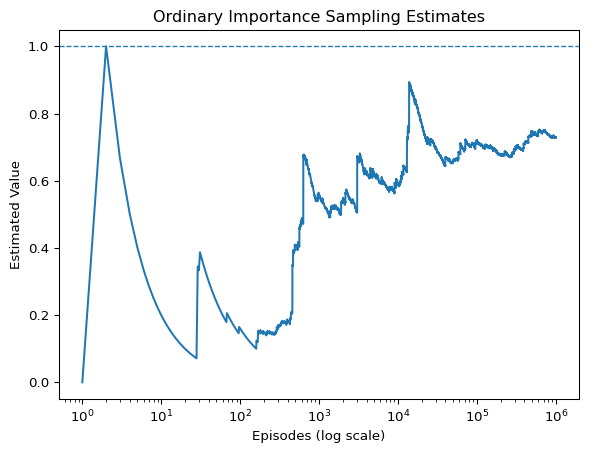

In [7]:
# | code-fold: true

import random
import matplotlib.pyplot as plt

# Define actions and policies
actions = ["left", "right"]
target_policy = {"left": 1.0, "right": 0.0}
behaviour_policy = {"left": 0.5, "right": 0.5}

# Calculate sampling ratios for ordinary importance sampling
sampling_ratio = {
    action: target_policy[action] / behaviour_policy[action] for action in actions
}

# Number of episodes
num_episodes = 1_000_000

estimated_value = 0.0
estimates = []

for i in range(1, num_episodes + 1):
    # Importance sampling ratio for this episode
    imp_samp_ratio = 1.0

    while True:
        if random.random() < behaviour_policy["left"]:
            imp_samp_ratio *= sampling_ratio["left"]
            if random.random() < 0.1:
                reward, episode_over = (1, True)
            else:
                reward, episode_over = (0, False)
        else:
            imp_samp_ratio *= sampling_ratio["right"]
            reward, episode_over = (0, False)

        if episode_over:
            scaled_return = reward * imp_samp_ratio
            estimated_value += (scaled_return - estimated_value) / i
            estimates.append(estimated_value)
            break

plt.figure()
plt.plot(range(1, num_episodes + 1), estimates)
# plt.ylim(0, 2)
plt.axhline(y=1.0, linestyle="--", linewidth=1)
plt.xscale("log")
plt.xlabel("Episodes (log scale)")
plt.ylabel("Estimated Value")
plt.title("Ordinary Importance Sampling Estimates")
plt.show()